**Importing all necessary libraries**

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [121]:
#Reading Data
data = pd.read_csv('train.csv')

In [122]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [123]:
#Renaming Columns for suitable purpose
data.columns =['date','summary','precip_type','temperature','apparent_temperature','humidity','wind_speed','wind_bearing','visibility','cloud_cover','pressure','daily_summary']

In [127]:
data.head()

,date,summary,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure,daily_summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [128]:
#Changing date object type to datetime
data['date']=pd.to_datetime(data['date'],utc=True)

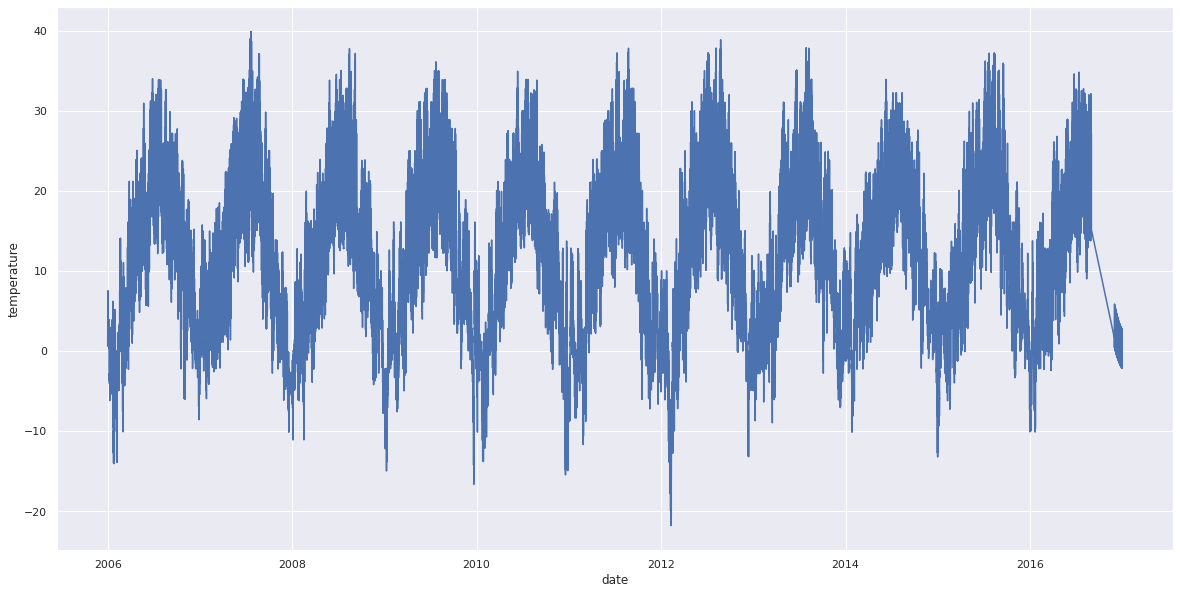

In [129]:
#Graphical Analysis of data
sns.set(rc = {'figure.figsize':(20,10)})
#checking the data sumary over time
temperature=sns.lineplot(x='date',y='temperature',data=data,color='b')


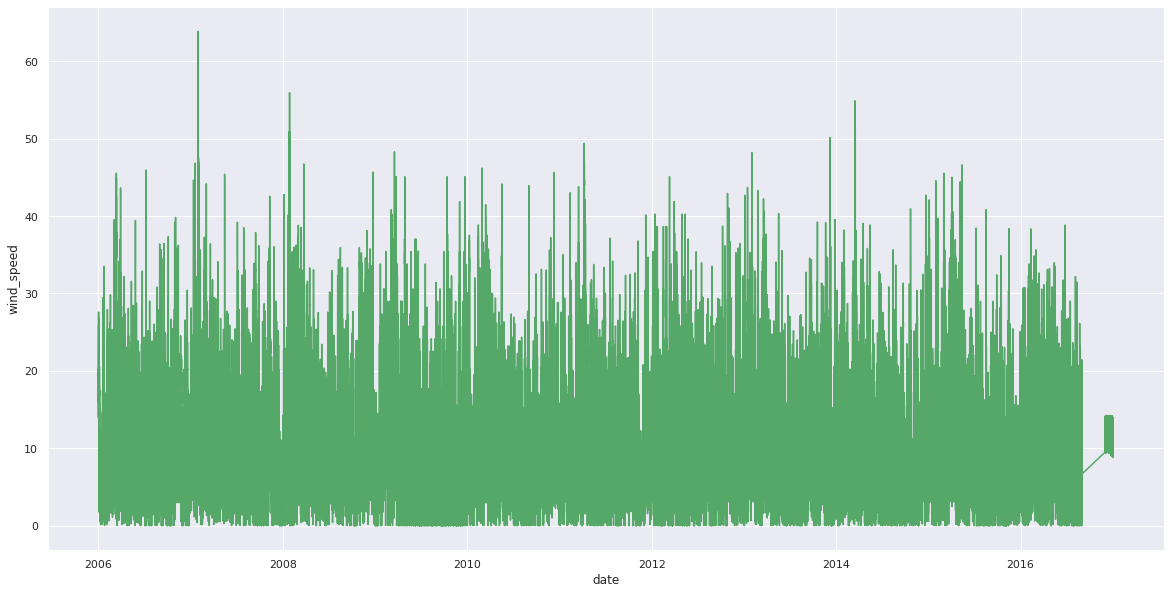

In [130]:
wind_speed=sns.lineplot(x='date',y='wind_speed',data=data,color='g')


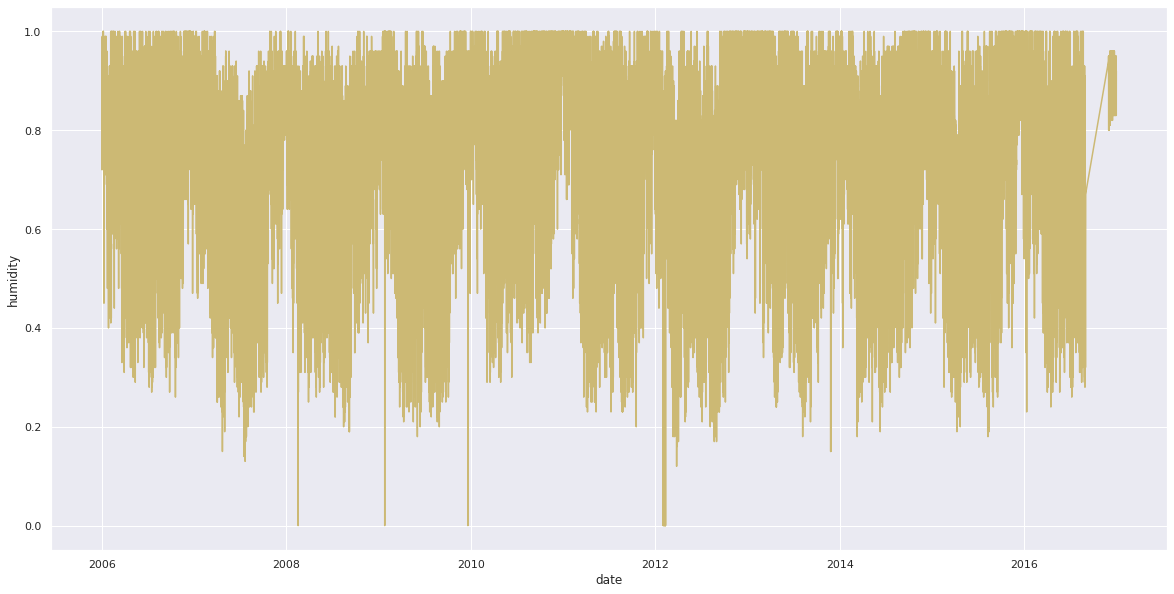

In [131]:
humidity=sns.lineplot(x='date',y='humidity',data=data,color='y')

**Feature Engineering**

In [132]:
#Extracting Date and Time from date column
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day

In [133]:
#checking the correlation between data
data.corr()

,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure,year,month,day
temperature,1.000000,0.992615,-0.630608,0.009902,0.030361,0.391739,NaN,-0.005064,0.020983,0.156251,0.003226
apparent_temperature,0.992615,1.000000,-0.600912,-0.056005,0.029313,0.380412,NaN,0.000169,0.020459,0.165811,0.005856
humidity,-0.630608,-0.600912,1.000000,-0.226191,0.000747,-0.368906,NaN,0.004802,0.032189,0.050529,0.003519
wind_speed,0.009902,-0.056005,-0.226191,1.000000,0.103928,0.105131,NaN,-0.048979,0.002298,-0.097680,-0.008010
wind_bearing,0.030361,0.029313,0.000747,0.103928,1.000000,0.050142,NaN,-0.011436,-0.023660,-0.017550,-0.003235
visibility,0.391739,0.380412,-0.368906,0.105131,0.050142,1.000000,NaN,0.061321,0.115521,-0.069146,-0.020740
cloud_cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure,-0.005064,0.000169,0.004802,-0.048979,-0.011436,0.061321,NaN,1.000000,0.011436,-0.022826,-0.015940
year,0.020983,0.020459,0.032189,0.002298,-0.023660,0.115521,NaN,0.011436,1.000000,-0.038948,0.000657
month,0.156251,0.165811,0.050529,-0.097680,-0.017550,-0.069146,NaN,-0.022826,-0.038948,1.000000,0.010636


In [134]:
#As in above relation apparent_temperature is nearly same as tempperature data,hence we can easily drop this line
#'cloud cover has 0 values in all column hence it is also not important

In [135]:
data=data.drop('cloud_cover',axis=1)

In [136]:
data=data.drop('apparent_temperature',axis=1)

In [137]:
#checking Data distribution in column
data.describe()

,temperature,humidity,wind_speed,wind_bearing,visibility,pressure,year,month,day
count,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000
mean,11.949454,0.733875,10.838893,187.707907,10.355367,1002.864099,2010.884404,6.442462,15.728243
std,9.601178,0.196034,6.950710,107.652333,4.172897,118.290080,3.104544,3.444723,8.803119
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,1.000000,1.000000
25%,4.527778,0.600000,5.796000,114.000000,8.372000,1011.800000,2008.000000,3.000000,8.000000
50%,12.077778,0.780000,10.014200,180.000000,10.046400,1016.330000,2011.000000,6.000000,16.000000
75%,18.866667,0.890000,14.151900,290.000000,14.812000,1021.090000,2014.000000,9.000000,23.000000
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000,2016.000000,12.000000,31.000000


In [158]:
data


,summary,precip_type,temperature,humidity,wind_speed,wind_bearing,visibility,pressure,daily_summary,year,month,day
0,1,1,9.472222,0.89,14.1197,251,15.8263,1015.13,1,2006,3,31
1,1,1,9.355556,0.86,14.2646,259,15.8263,1015.63,1,2006,3,31
2,2,2,9.377778,0.89,3.9284,204,14.9569,1015.94,2,2006,4,1
3,1,1,8.288889,0.83,14.1036,269,15.8263,1016.41,1,2006,4,1
4,2,2,8.755556,0.83,11.0446,259,15.8263,1016.51,2,2006,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
94263,1,1,19.972222,0.40,9.4668,42,16.1000,1018.11,1,2016,5,9
94264,1,1,17.816667,0.46,3.8962,19,15.5526,1018.42,1,2016,5,9
94265,1,1,13.938889,0.67,8.0500,70,16.1000,1019.21,1,2016,5,9
94266,1,1,12.733333,0.77,8.0500,80,16.1000,1019.70,1,2016,5,9


In [139]:
#Creating class for encoding label
class token:
    def __init__(self,column,temp_local,temp_var):
        self.column=column
        self.temp_local=temp_local
        self.temp_var = temp_var
    def tokenizer(self):
        self.temp_local=[]
        self.temp_var=[]
        for i in data[self.column].values:
            if i not in self.temp_local and i != 'NaN':
                self.temp_local.append(i)
            if i in self.temp_local:
                temp = self.temp_local.index(i)+1
                self.temp_var.append(temp)
        return self.temp_var
    def token_name(self):
        return self.temp_local
    def dependent_tokenizer(self):
        temp = data[self.column].values[1]
        self.temp_local.append(temp)
        for i in data[self.column].values:
            if i==temp:
                self.temp_var.append(1)
            else:
                self.temp_var.append(0)
        return self.temp_var
    def dependent_token_name(self):
        return self.temp_local

In [140]:
#Encoding column
temp_name=[]
temp_num=[]
summary =  token('summary',temp_name,temp_num)
summary_data = np.array(summary.tokenizer())
precip_type =  token('precip_type',temp_name,temp_num)
precip_type_data = np.array(summary.tokenizer())
daily_summary =  token('daily_summary',temp_name,temp_num)
daily_summary_data = np.array(summary.tokenizer())

In [141]:
data['summary']=summary_data
data['precip_type']=precip_type_data
data['daily_summary']=daily_summary_data

In [142]:
data.dtypes

date             datetime64[ns, UTC]
summary                        int64
precip_type                    int64
temperature                  float64
humidity                     float64
wind_speed                   float64
wind_bearing                   int64
visibility                   float64
pressure                     float64
daily_summary                  int64
year                           int64
month                          int64
day                            int64
dtype: object

In [143]:
#Dropping unwanted Column
data=data.drop('date',axis=1)
y=data['daily_summary']
X=data.drop('daily_summary',axis=1)

In [144]:
#Splitting Our data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2529)

In [145]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((75414, 11), (18854, 11), (75414,), (18854,))

**Model Creation and Accuracy Checking**

In [146]:
cl = RandomForestClassifier(n_estimators=100,random_state=0)
cl.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [147]:
#Checking Accuracy of our model
y_test_pred = cl.predict(X_test)
score = accuracy_score(y_test,y_test_pred)


In [148]:
score

0.9998939217142251

**Evaluating the evaluat.csv file and creating output values**

In [149]:
evaluate=pd.read_csv('evaluate.csv')

In [150]:
evaluate.columns =['date','summary','precip_type','temperature','apparent_temperature','humidity','wind_speed','wind_bearing','visibility','cloud_cover','pressure']

In [151]:
class token2:
    def __init__(self,column,temp_local,temp_var):
        self.column=column
        self.temp_local=temp_local
        self.temp_var = temp_var
    def tokenizer(self):
        self.temp_local=[]
        self.temp_var=[]
        for i in evaluate[self.column].values:
            if i not in self.temp_local and i != 'NaN':
                self.temp_local.append(i)
            if i in self.temp_local:
                temp = self.temp_local.index(i)+1
                self.temp_var.append(temp)
        return self.temp_var
    def token_name(self):
        return self.temp_local
    def dependent_tokenizer(self):
        temp = evaluate[self.column].values[1]
        self.temp_local.append(temp)
        for i in evaluate[self.column].values:
            if i==temp:
                self.temp_var.append(1)
            else:
                self.temp_var.append(0)
        return self.temp_var
    def dependent_token_name(self):
        return self.temp_local

In [152]:
evaluate['date']=pd.to_datetime(evaluate['date'],utc=True)
evaluate['year']=evaluate['date'].dt.year
evaluate['month']=evaluate['date'].dt.month
evaluate['day']=evaluate['date'].dt.day
evaluate=evaluate.drop('cloud_cover',axis=1)
evaluate=evaluate.drop('apparent_temperature',axis=1)
evaluate=evaluate.drop('date',axis=1)
summary1 =  token2('summary',temp_name,temp_num)
summary_data1 = np.array(summary1.tokenizer())
precip_type1 =  token2('precip_type',temp_name,temp_num)
precip_type_data1 = np.array(precip_type1.tokenizer())


In [153]:
evaluate['summary']=summary_data1
evaluate['precip_type']=precip_type_data1
evaluate

,summary,precip_type,temperature,humidity,wind_speed,wind_bearing,visibility,pressure,year,month,day
0,1,1,15.49444,0.78,6.4239,182,16.1000,1013.50,2015,2,28
1,1,1,15.37778,0.81,3.4293,201,16.1000,1013.70,2015,3,1
2,1,1,15.78333,0.80,5.5867,174,15.1823,1013.73,2015,3,1
3,1,1,14.70556,0.84,6.5044,219,16.1000,1013.90,2015,3,1
4,1,1,14.68333,0.83,3.2200,190,16.1000,1013.72,2015,3,1
...,...,...,...,...,...,...,...,...,...,...,...
714,2,1,25.02222,0.41,4.7817,179,16.1000,1010.41,2015,3,8
715,2,1,23.86111,0.45,3.4454,180,16.1000,1010.80,2015,3,8
716,2,1,21.42778,0.53,3.9123,48,15.5526,1011.11,2015,3,8
717,2,1,18.83889,0.73,0.0000,0,16.1000,1011.42,2015,3,8


In [154]:
y_test = cl.predict(evaluate)

In [188]:
check_data=pd.read_csv('train.csv')
val=[]
for i in check_data['Daily Summary'].values:
  if i not in val:
    val.append(i)

In [198]:
final_out = []
date=[]
for i in y_test:
  final_out.append(val[i])

In [203]:
temp_date = pd.read_csv('evaluate.csv')
fin = pd.DataFrame({'date':temp_date['Formatted Date'],'output':final_out})
fin.to_csv('prediction_output.csv')

In [204]:
ch = pd.read_csv('prediction_output.csv')

In [205]:
ch

,Unnamed: 0,date,output
0,0,2015-03-01 00:00:00.000 +0100,Mostly cloudy throughout the day.
1,1,2015-03-01 01:00:00.000 +0100,Mostly cloudy throughout the day.
2,2,2015-03-01 02:00:00.000 +0100,Mostly cloudy throughout the day.
3,3,2015-03-01 03:00:00.000 +0100,Mostly cloudy throughout the day.
4,4,2015-03-01 04:00:00.000 +0100,Mostly cloudy throughout the day.
...,...,...,...
714,714,2015-03-08 19:00:00.000 +0100,Mostly cloudy throughout the day.
715,715,2015-03-08 20:00:00.000 +0100,Mostly cloudy throughout the day.
716,716,2015-03-08 21:00:00.000 +0100,Mostly cloudy throughout the day.
717,717,2015-03-08 22:00:00.000 +0100,Mostly cloudy throughout the day.
